<a href="https://colab.research.google.com/github/Codefedy/Heart-Disease-Predictive-Model/blob/main/HDModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install notebook

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns #for plotting

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc #for model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier #for the model

In [ ]:
from sklearn.feature_selection import mutual_info_classif


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pydot

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import export_graphviz #plot tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.metrics import confusion_matrix #for model evaluation


In [ ]:
from sklearn.metrics import classification_report #for model evaluation

In [ ]:
!pip install eli5 #for purmutation 

In [ ]:
import eli5


In [ ]:
from eli5.sklearn import PermutationImportance

In [ ]:
pip install shap #for SHAP values


In [ ]:
import shap

In [ ]:
from sklearn.model_selection import train_test_split #for data splitting

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install --upgrade matplotlib==3.1.1 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import pdp, info_plots #for partial plots

In [ ]:
np.random.seed(123) #ensure reproducibility

In [ ]:
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dp = pd.read_csv('/content/drive/My Drive/UWE-ML/HD_Prediction.csv')

In [ ]:
dp.head(6)

index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   
5      5   65    1                4  120          177             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   
5            0     140                0            0.4            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence  
5                        0         7       Absence

Let's clean the data to better understand the analysis and naming conventions. (Also see interpretation for terminologies).

sex will be assigned (1 = male, 0 =female)

Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

BP is the blood pressure rate of the individual.

Fbs over 120: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

EKG Result: will be assigne restEKG which means Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

MAX HR will be assigned "Maximum heart rate".

Exercise angina: Exercise induced angina (1 = yes; 0 = no). This means chest pain or tightness induced by excercise.

ST DEPRESSION:Induced by exercise relative to rest ('ST' relates to positions on the EKG plot).

Slope of ST: The peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).

Number of vessels fluro: This feature represents a discrete value indicating the count of vessels. For example, it could range from 0 (indicating no vessels colored) to 3 (indicating all three major vessels colored). Each vessel represents a major coronary artery: the left anterior descending (LAD), the left circumflex (LCX), and the right coronary artery (RCA).

Thallium: A toxic heavy metal that can have adverse effects on various organs and systems in the body if ingested or exposed to in large amounts.

Heart Disease: This will be the target to identify persons with or without heart disease. This is represented with "Presence" or "Absence".

Lets improve the analysis interpretation by changing the values of the
categorical vaiables.

In [ ]:
dp = dp.drop(dp.columns[0], axis=1)

In [ ]:
dp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ekg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'slope_of_ST', 'num_major_vessels', 'thallium', 'target(HeartDisease)']

Changing the values of categorical variables to improve interpretation

In [ ]:
dp['sex'][dp['sex'] == 'female'] = 0
dp['sex'][dp['sex'] == 'male'] = 1

dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 2] = 'atypical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 3] = 'non-anginal pain'
dp['chest_pain_type'][dp['chest_pain_type'] == 4] = 'asymptomatic'

dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dp['rest_ekg'][dp['rest_ekg'] == 0] = 'normal'
dp['rest_ekg'][dp['rest_ekg'] == 1] = 'left ventricular hypertrophy'
dp['rest_ekg'][dp['rest_ekg'] == 2] = 'ST-T wave abnormality'

dp['exercise_angina'][dp['exercise_angina'] == 0] = 'no'
dp['exercise_angina'][dp['exercise_angina'] == 1] = 'yes'

dp['slope_of_ST'][dp['slope_of_ST'] == 1] = 'upsloping'
dp['slope_of_ST'][dp['slope_of_ST'] == 2] = 'flat'
dp['slope_of_ST'][dp['slope_of_ST'] == 3] = 'downsloping'

dp['thallium'][dp['thallium'] == 3] = 'normal'
dp['thallium'][dp['thallium'] == 6] = 'fixed defect'
dp['thallium'][dp['thallium'] == 7] = 'reversable defect'

dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Absence'] = 0
dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Presence'] = 1

In [ ]:


dp.dtypes



age                         int64
sex                         int64
chest_pain_type            object
resting_blood_pressure      int64
cholesterol                 int64
fasting_blood_sugar        object
rest_ekg                   object
max_heart_rate              int64
exercise_angina            object
st_depression             float64
slope_of_ST                object
num_major_vessels           int64
thallium                   object
target(HeartDisease)       object
dtype: object

## Correctness of dtype Not quite right. 

In [ ]:


dp['sex'] = dp['sex'].astype('object')
dp['chest_pain_type'] = dp['chest_pain_type'].astype('object')
dp['fasting_blood_sugar'] = dp['fasting_blood_sugar'].astype('object')
dp['rest_ekg'] = dp['rest_ekg'].astype('object')
dp['exercise_angina'] = dp['exercise_angina'].astype('object')
dp['slope_of_ST'] = dp['slope_of_ST'].astype('object')
dp['thallium'] = dp['thallium'].astype('object')
dp['target(HeartDisease)'] = dp['target(HeartDisease)'].astype('int64')



In [ ]:


dp.dtypes



age                         int64
sex                        object
chest_pain_type            object
resting_blood_pressure      int64
cholesterol                 int64
fasting_blood_sugar        object
rest_ekg                   object
max_heart_rate              int64
exercise_angina            object
st_depression             float64
slope_of_ST                object
num_major_vessels           int64
thallium                   object
target(HeartDisease)        int64
dtype: object

In [ ]:
dp.head()

age sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   70   1      asymptomatic                     130          322   
1   67   0  non-anginal pain                     115          564   
2   57   1   atypical angina                     124          261   
3   64   1      asymptomatic                     128          263   
4   74   0   atypical angina                     120          269   

   fasting_blood_sugar               rest_ekg  max_heart_rate exercise_angina  \
0  lower than 120mg/ml  ST-T wave abnormality             109              no   
1  lower than 120mg/ml  ST-T wave abnormality             160              no   
2  lower than 120mg/ml                 normal             141              no   
3  lower than 120mg/ml                 normal             105             yes   
4  lower than 120mg/ml  ST-T wave abnormality             121             yes   

   st_depression slope_of_ST  num_major_vessels           thallium  \
0            2.4        flat                  3             normal   
1            1.6        flat                  0  reversable defect   
2            0.3   upsloping                  0  reversable defect   
3            0.2        flat                  1  reversable defect   
4            0.2   upsloping                  1             normal   

   target(HeartDisease)  
0                     1  
1                     0  
2                     1  
3                     0  
4                     0

Some of the types will be changed to categorical variables for better

creating dummy variables - #ONE HOT CODING

In [ ]:

dp_encoded = pd.get_dummies(dp, columns=['thallium'], drop_first=True)

In [ ]:


dp = pd.get_dummies(dp, drop_first=True)



In [ ]:
dp.head()

age  resting_blood_pressure  cholesterol  max_heart_rate  st_depression  \
0   70                     130          322             109            2.4   
1   67                     115          564             160            1.6   
2   57                     124          261             141            0.3   
3   64                     128          263             105            0.2   
4   74                     120          269             121            0.2   

   num_major_vessels  target(HeartDisease)  sex_1  \
0                  3                     1      1   
1                  0                     0      0   
2                  0                     1      1   
3                  1                     0      1   
4                  1                     0      0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 0   
1                                0                                 1   
2                                1                                 0   
3                                0                                 0   
4                                1                                 0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                               0                                        1   
1                               0                                        1   
2                               0                                        1   
3                               0                                        1   
4                               0                                        1   

   rest_ekg_left ventricular hypertrophy  rest_ekg_normal  \
0                                      0                0   
1                                      0                0   
2                                      0                1   
3                                      0                1   
4                                      0                0   

   exercise_angina_yes  slope_of_ST_flat  slope_of_ST_upsloping  \
0                    0                 1                      0   
1                    0                 1                      0   
2                    0                 0                      1   
3                    1                 1                      0   
4                    1                 0                      1   

   thallium_normal  thallium_reversable defect  
0                1                           0  
1                0                           1  
2                0                           1  
3                0                           1  
4                1                           0

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=42)

Lets check Logistic Regression Model on the dataset.

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)  

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[33  0]
 [ 6 15]]
Accuracy: 0.8888888888888888
Precision: 1.0
Recall: 0.7142857142857143
F1-score: 0.8333333333333333
Sensitivity: 0.8461538461538461
Specificity: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.71      0.83        21

    accuracy                           0.89        54
   macro avg       0.92      0.86      0.88        54
weighted avg       0.91      0.89      0.88        54



In [ ]:
auc_roc = roc_auc_score(y_test, y_pred)

In [ ]:
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8571428571428572


In [ ]:
logreg_probs = model.predict_proba(X_test)[:, 1]



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg_probs)
roc_auc = roc_auc_score(y_test, logreg_probs)

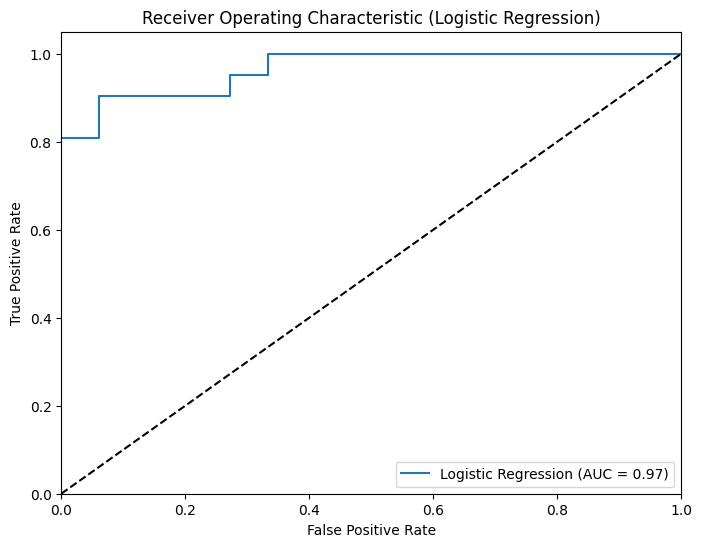

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

Applying regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting and improve the model's generalization ability.

**RANDOM FOREST MODEL**

In [ ]:
from subprocess import call
from IPython.display import Image

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Fit the decision tree model
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

export_graphviz(dt_model, out_file='tree.dot',
                feature_names=X_train.columns,
                class_names=['No Disease', 'Disease'],
                rounded=True, proportion=True,
                label='root', precision=2, filled=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#
Image(filename='tree.png')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[28  5]
 [ 6 15]]
Accuracy: 0.7962962962962963
Precision: 0.75
Recall: 0.7142857142857143
F1-score: 0.7317073170731706
Sensitivity: 0.8235294117647058
Specificity: 0.75
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.75      0.71      0.73        21

    accuracy                           0.80        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.79      0.80      0.80        54



MODEL EVALUATION USING PERMUTATION 

In [ ]:

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



In [ ]:
print(X_test.columns)

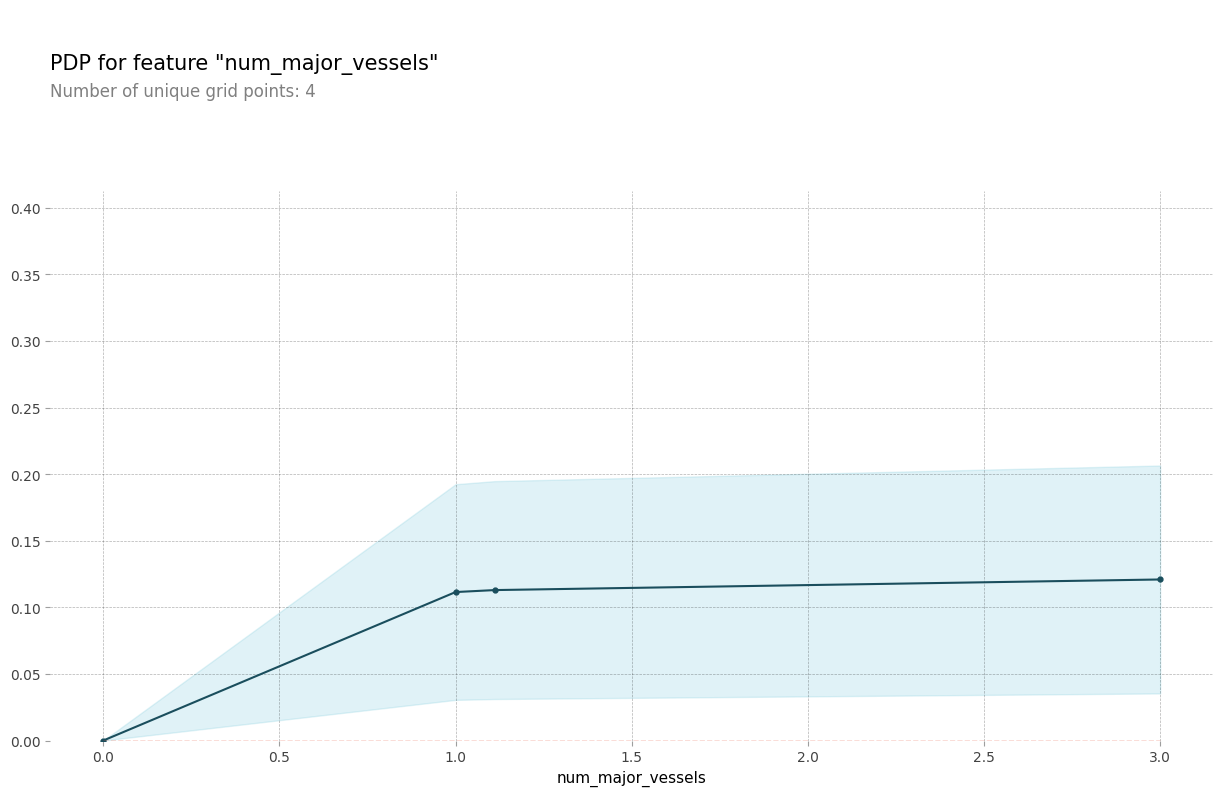

In [ ]:
base_features = dp.columns.values.tolist()
base_features.remove('target(HeartDisease)')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

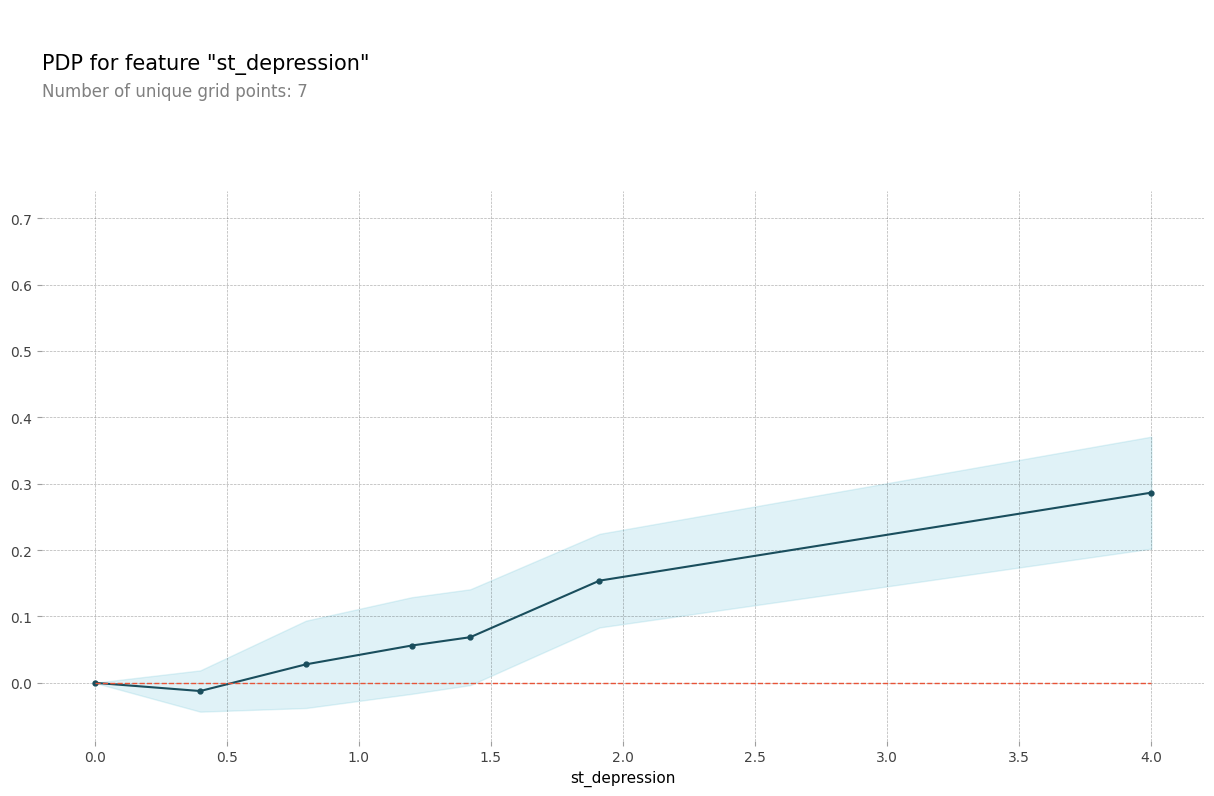

In [ ]:


feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

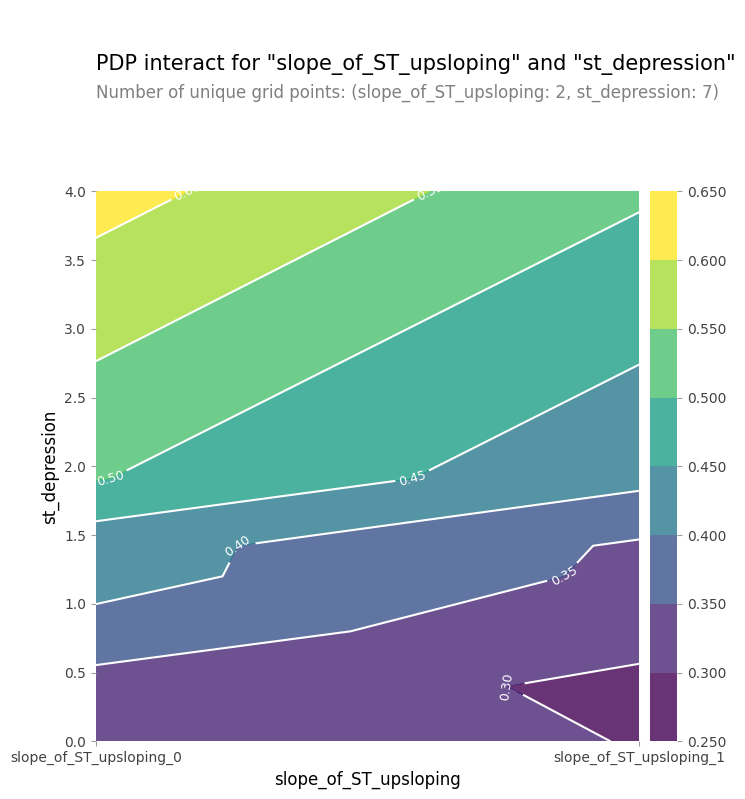

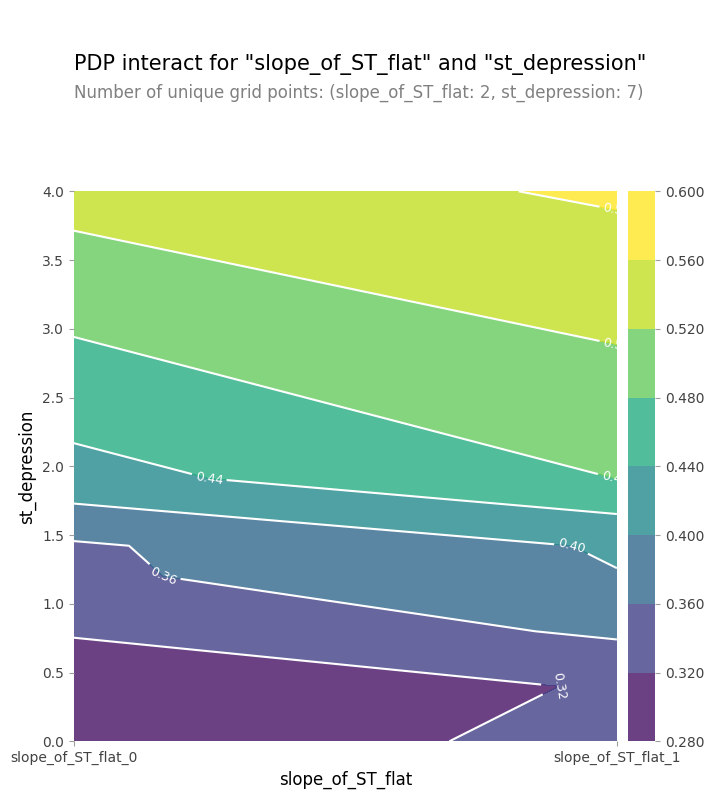

In [ ]:
inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_upsloping', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_upsloping', 'st_depression'], plot_type='contour')
plt.show()

inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_flat', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_flat', 'st_depression'], plot_type='contour')
plt.show()

In [ ]:
importances = model.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

In [ ]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [ ]:
print(feature_importances.head())

            Feature  Importance
4     st_depression    0.144727
3    max_heart_rate    0.120773
16  thallium_normal    0.097139
0               age    0.096152
2       cholesterol    0.089598


In [ ]:
# Analyzing the feature importances to determine the major causes of heart disease
major_causes = feature_importances['Feature'].head().tolist()
print("Major Causes of Heart Disease:", major_causes)

Major Causes of Heart Disease: ['st_depression', 'max_heart_rate', 'thallium_normal', 'age', 'cholesterol']


SHAP ANALYSIS TO GAIN INSIGHT AND MAKE INFORMED DECISION 

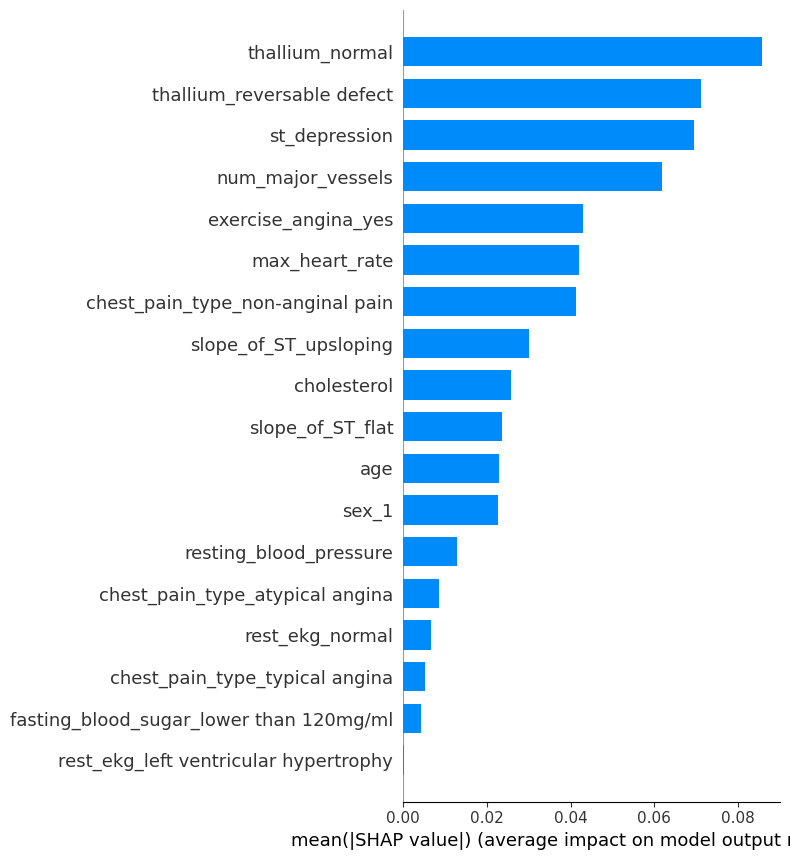

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

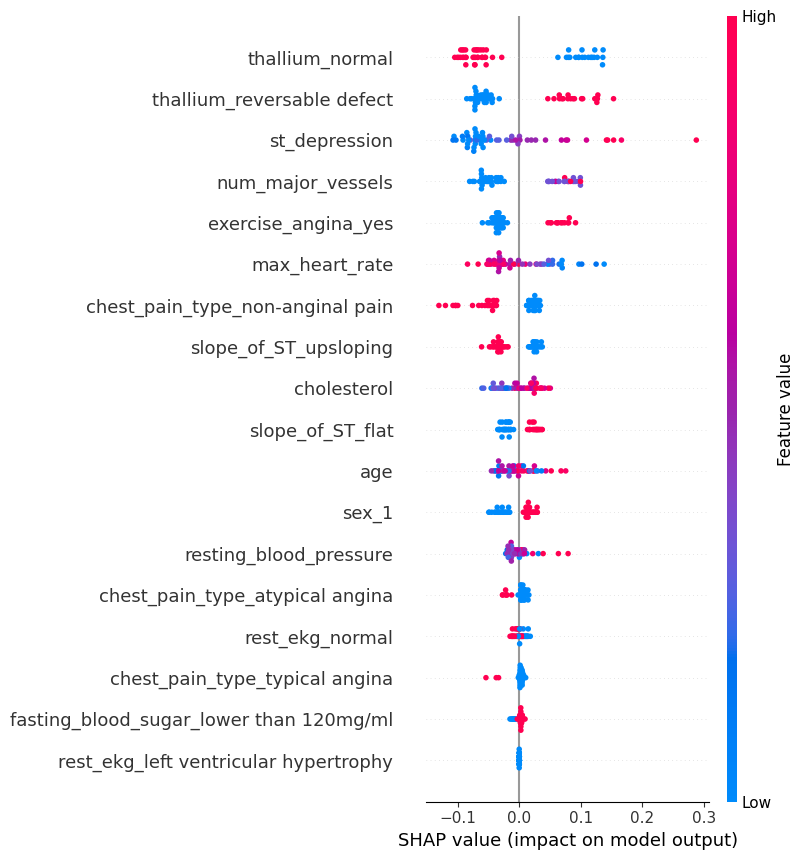

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
pip install shap.intjs()

In [ ]:
def heart_disease_risk_pred(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [ ]:

data_for_prediction = X_test.iloc[5,:].astype(float)
heart_disease_risk_pred(model, data_for_prediction)



In [ ]:
data_for_prediction = X_test.iloc[12,:].astype(float)
heart_disease_risk_pred(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[2,:].astype(float)
heart_disease_risk_pred(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[14,:].astype(float)
heart_disease_risk_pred(model, data_for_prediction)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

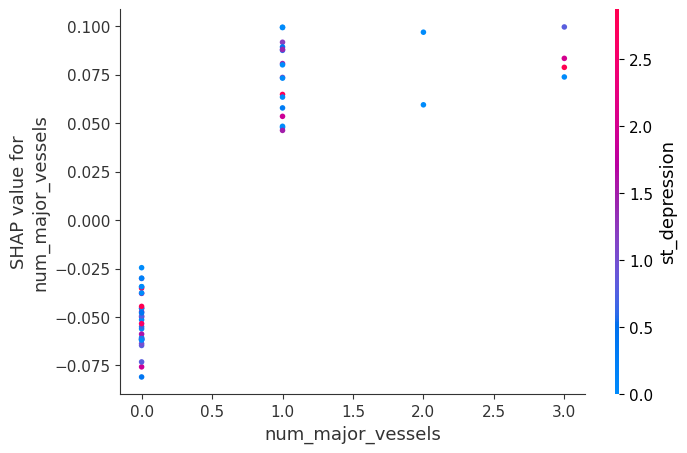

In [ ]:
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

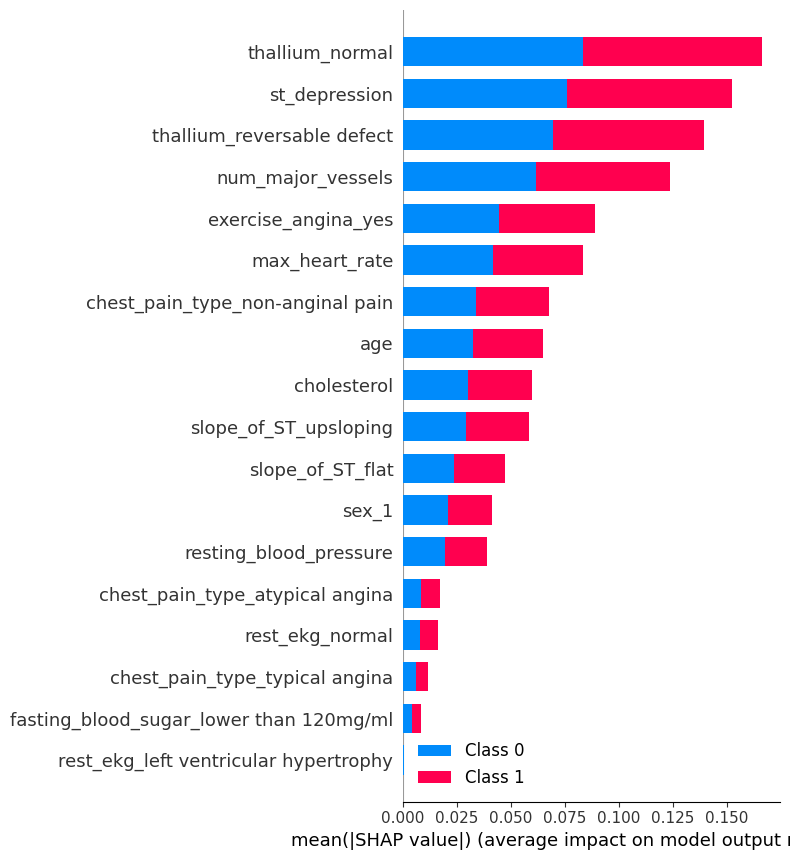

In [ ]:

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


ROC CURVE & SCORE

In [ ]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

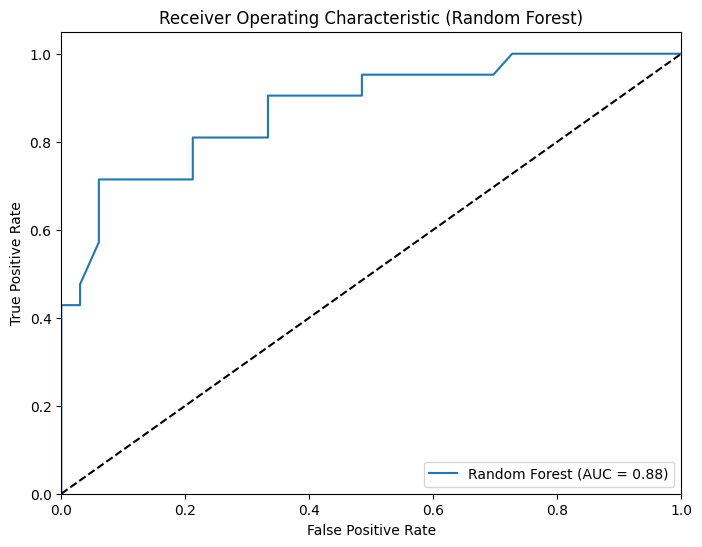

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine Model**




preprocessing the data by scaling the features.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Radial basis function (RBF) kernel

In [ ]:
model = SVC(kernel='rbf')  
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[28  5]
 [ 6 15]]
Accuracy: 0.6296296296296297
Sensitivity: 0.8235294117647058
Specificity: 0.75


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72        33
           1       0.53      0.38      0.44        21

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.61      0.63      0.61        54



In [ ]:
X = dp.drop('target(HeartDisease)', axis=1)

In [ ]:
svm_probs = model.decision_function(X)

In [ ]:
svm_fpr, svm_tpr, _ = roc_curve(dp['target(HeartDisease)'], svm_probs)

In [ ]:
svm_auc = roc_auc_score(dp['target(HeartDisease)'], svm_probs)

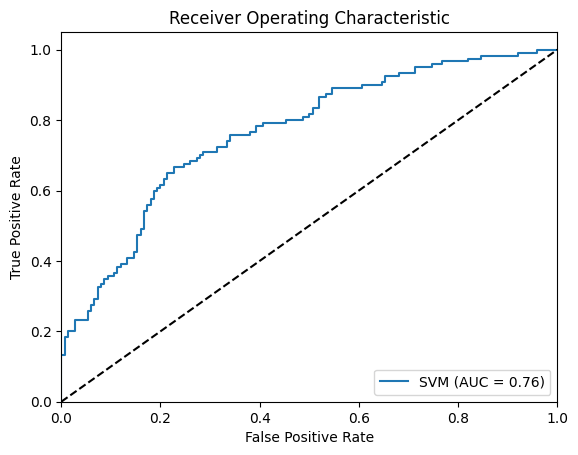

In [ ]:
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(svm_model, X_train, y_train, cv=5)

**Calculating the mean and standard deviation of the training and validation scores

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

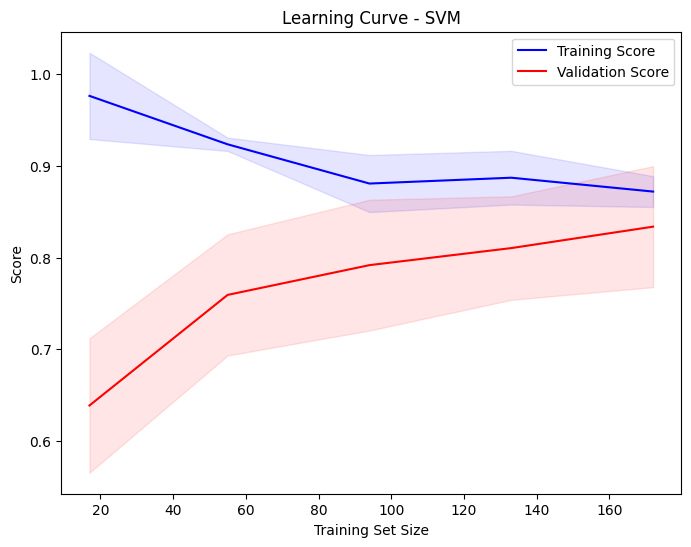

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - SVM')
plt.legend(loc='best')
plt.show()


DECISION TREE **bold text**

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7962962962962963


**Feature Importance**

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


                                    Feature  Importance
4                             st_depression    0.144727
3                            max_heart_rate    0.120773
16                          thallium_normal    0.097139
0                                       age    0.096152
2                               cholesterol    0.089598
17               thallium_reversable defect    0.079724
1                    resting_blood_pressure    0.075593
5                         num_major_vessels    0.072461
13                      exercise_angina_yes    0.053161
8          chest_pain_type_non-anginal pain    0.037816
15                    slope_of_ST_upsloping    0.033387
14                         slope_of_ST_flat    0.026905
6                                     sex_1    0.020598
12                          rest_ekg_normal    0.018757
9            chest_pain_type_typical angina    0.013087
7           chest_pain_type_atypical angina    0.010949
10  fasting_blood_sugar_lower than 120mg/ml    0

In [ ]:
print("Length of X.columns:", len(X.columns))
print("Length of importances:", len(importances))


Length of X.columns: 18
Length of importances: 18


In [ ]:
print("X shape:", X.shape)
print("Importances shape:", importances.shape)


X shape: (270, 18)
Importances shape: (18,)


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[26  7]
 [13  8]]
Accuracy: 0.6296296296296297
Sensitivity: 0.6666666666666666
Specificity: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        33
           1       0.53      0.38      0.44        21

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.61      0.63      0.61        54



NeEURAL NETWORK

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=10)


In [ ]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=10)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1]
Accuracy: 0.8518518518518519


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])



In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31  2]
 [ 6 15]]
Accuracy: 0.8518518518518519
Sensitivity: 0.8378378378378378
Specificity: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



**BAGGING CLASSIFIER**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
base_estimator = DecisionTreeClassifier()

In [ ]:
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=10)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])


In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31  2]
 [ 6 15]]
Accuracy: 0.8518518518518519
Sensitivity: 0.8378378378378378
Specificity: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'base_estimator__max_depth': [None, 3, 5]
}

In [ ]:
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5)
nested_scores = cross_val_score(grid_search, X, y, cv=5)

In [ ]:

print("Nested CV Accuracy: {:.2f} +/- {:.2f}".format(nested_scores.mean(), nested_scores.std()))


Nested CV Accuracy: 0.81 +/- 0.06


**XGBOOST **

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import xgboost as xgb

In [ ]:

xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print("Number of columns in X:", X.shape[1])
print("Length of importances:", len(importances))

Number of columns in X: 18
Length of importances: 18


In [ ]:
importances = xgb_model.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

In [ ]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

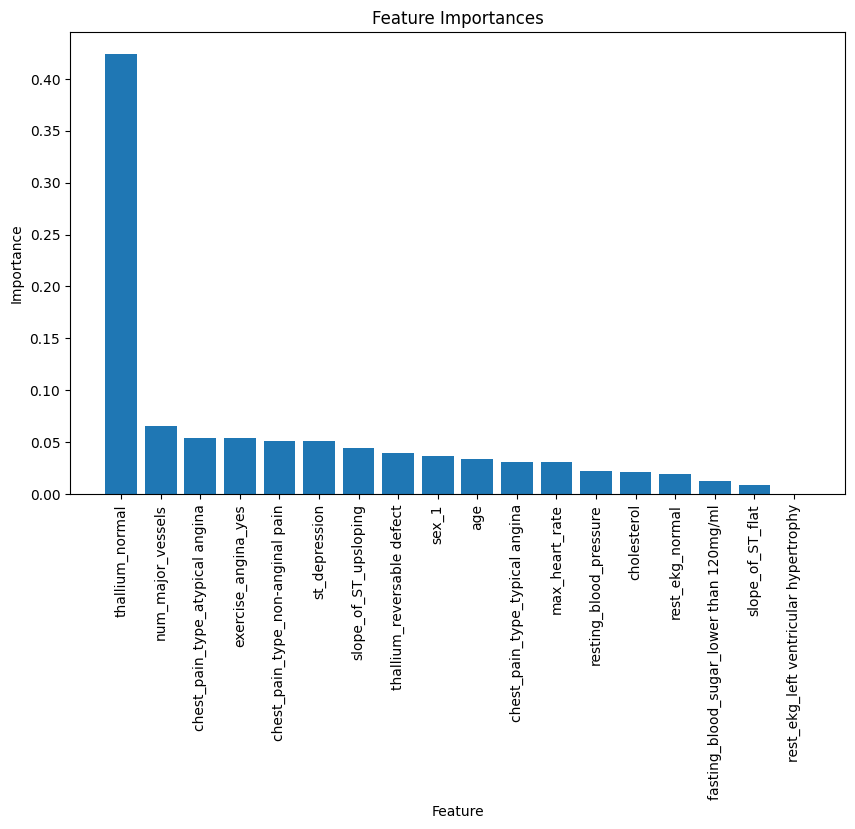

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Lets predict model accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[20  6]
 [ 5 23]]
Accuracy: 0.7962962962962963
Sensitivity: 0.8
Specificity: 0.7931034482758621
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.79      0.82      0.81        28

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



Risk Score

In [873]:
risk_scores = xgb_model.predict_proba(X)

In [874]:
dp['HeartDisease_Risk'] = risk_scores[:, 1]

In [875]:
at_risk_individuals = dp[dp['HeartDisease_Risk'] > 0.5]

In [ ]:
print(at_risk_individuals)

In [877]:
major_causes = feature_importances['Feature'].head().tolist()
print("Major Causes of Heart Disease:", major_causes)

Major Causes of Heart Disease: ['thallium_normal', 'num_major_vessels', 'chest_pain_type_atypical angina', 'exercise_angina_yes', 'chest_pain_type_non-anginal pain']


**Extra Tree Classifier**

In [878]:
from sklearn.ensemble import ExtraTreesClassifier

In [879]:
et = ExtraTreesClassifier()

In [880]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [881]:
y_pred = et.predict(X_test)

In [882]:
print("Number of columns in X:", X.shape[1])
print("Length of importances:", len(importances))

Number of columns in X: 18
Length of importances: 18


In [883]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [884]:
print(feature_importances.head())

                             Feature  Importance
16                   thallium_normal    0.423805
5                  num_major_vessels    0.065575
7    chest_pain_type_atypical angina    0.053618
13               exercise_angina_yes    0.053603
8   chest_pain_type_non-anginal pain    0.051602


In [885]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

In [886]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31  2]
 [ 6 15]]
Accuracy: 0.8518518518518519
Sensitivity: 0.8378378378378378
Specificity: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54

